<a href="https://colab.research.google.com/github/larissavvsous/Analise-de-Regressao-1/blob/main/regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>  Disciplina: Análise de Regressão I
## <center> Dupla: Larissa Sousa, Ruan Rodrigues

---

## Iremos utilizar o modelo de Regressão Logística para resolver o problema de classificação binária, onde o objetivo é prever se ocorre um AVC (Acidente Vascular Cerebral) ou não, dados 9 preditores:

1. o gênero da pessoa
  - Feminino: 0
  - Masculino: 1
2. a idade da pessoa
3. se possui ou não hipertensão
  - Não: 0
  - Sim: 1
4. se possui ou não doença cardíaca
  - Não: 0
  - Sim: 1
5. condição de fumante
  - Fumava antes: 0
  - Nunca fumou: 1
  - Fuma: 2
  - Desconhecido: 3
6. o tipo de trabalho
  - Privado: 0
  - Autônomo: 1
  - Criança: 2
  - Trabalho governo: 3
  - Nunca trabalhou: 4
7. o tipo de residência
  - Rural: 0
  - Urbano: 1
  - Criança: 2
  - Trabalho governo: 3
  - Nunca trabalhou: 4
8. o nível médio de glicose
9. o IMC
10. e a coluna alvo AVC
  - Não: 0
  - Sim: 1


<center> O modelo terá essa configuração:
<center> $P(AVC)=\frac{1}{1+e^{-\beta_0 + \beta_1 \times genero + \beta_2 \times idade +...+ \beta_8 \times glicose}}$





### Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score
from imblearn.over_sampling import SMOTE

### Dataset

In [2]:
df = pd.read_csv('/content/df_reg.csv')
df = df.drop(['id', 'Unnamed: 0'], axis=1)
df

,genero,idade,hipertensao,doenca_cardiaca,tipo_trabalho,tipo_residencia,nivel_medio_glicose,IMC,condicao_fumante,AVC
0,1,67.0,0,1,3,1,228.69,36.6,2,1
1,1,80.0,0,1,3,0,105.92,32.5,3,1
2,0,49.0,0,0,3,1,171.23,34.4,1,1
3,0,79.0,1,0,0,0,174.12,24.0,3,1
4,1,81.0,0,0,3,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...
4903,0,13.0,0,0,1,0,103.08,18.6,0,0
4904,0,81.0,0,0,0,1,125.20,40.0,3,0
4905,0,35.0,0,0,0,0,82.99,30.6,3,0
4906,1,51.0,0,0,3,0,166.29,25.6,2,0


### Normailzando colunas

In [3]:
colunas = ['idade', 'nivel_medio_glicose', 'IMC']

normalizador = MinMaxScaler(feature_range=(0,1))

df[colunas] = normalizador.fit_transform(df[colunas])
df.head()

df = df

### Verificando se a amostra está balanceada

<Axes: xlabel='hipertensao', ylabel='count'>

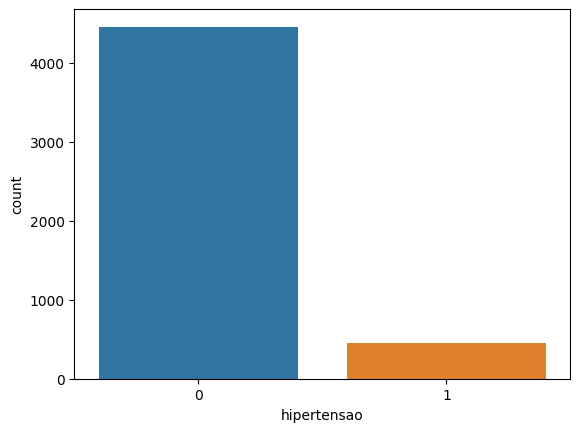

In [4]:
sns.countplot(x='hipertensao', data=df)

In [5]:
contagem = df['hipertensao'].value_counts()
print('Classe 0 =', contagem[0])
print('Classe 1 =', contagem[1])

Classe 0 = 4457
Classe 1 = 451


##### Não está

### Modelo: Regressão Logística

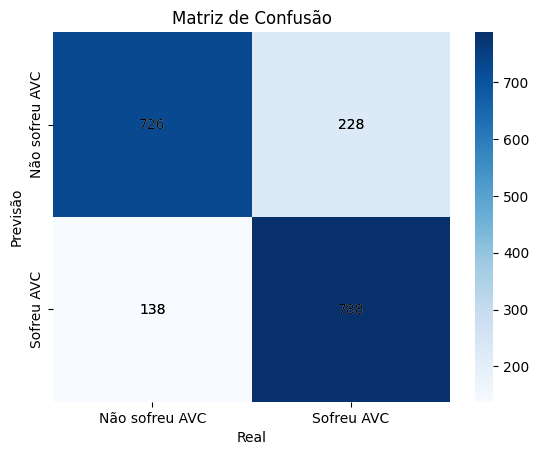


Acurácia: 0.8053191489361702

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       954
           1       0.78      0.85      0.81       926

    accuracy                           0.81      1880
   macro avg       0.81      0.81      0.81      1880
weighted avg       0.81      0.81      0.81      1880


F1 score: 0.8115345005149331

Precisão: 0.7755905511811023

Matriz de confusão:
 [[726 228]
 [138 788]]


In [6]:
# Separando X e y
X = df.drop(['AVC'], axis=1)
y = df['AVC']

# Balanceando as classes com SMOTE
smote = SMOTE(random_state=32)
X_smote_res, y_smote_res = smote.fit_resample(X, y)

# Dividindo o conjunto de dados em treino e teste
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_res, y_smote_res, test_size=0.2, random_state=0)

# Inicializando o modelo de regressão logística
clf = LogisticRegression()

# Treinando o modelo com os dados
clf.fit(X_train_smote, y_train_smote)

# Fazendo previsões no conjunto de teste
y_pred_smote = clf.predict(X_test_smote)

# Avaliando o modelo com SMOTE
matriz_confusao = confusion_matrix(y_test_smote, y_pred_smote)

# Gráfico da matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Não sofreu AVC', 'Sofreu AVC'], yticklabels=['Não sofreu AVC', 'Sofreu AVC'])
plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Matriz de Confusão')

# Adicionando rótulos
for i in range(len(matriz_confusao)):
    for j in range(len(matriz_confusao[i])):
        plt.text(j + 0.5, i + 0.5, f"{matriz_confusao[i][j]}", ha='center', va='center')

plt.show()

# Calculando métricas do modelo com SMOTE
print(f'\nAcurácia: {accuracy_score(y_test_smote, y_pred_smote)}')
print(f'\nClassification report:\n{classification_report(y_test_smote, y_pred_smote, labels=[0, 1])}')
print(f'\nF1 score: {f1_score(y_test_smote, y_pred_smote)}')
print(f'\nPrecisão: {precision_score(y_test_smote, y_pred_smote)}')
print("\nMatriz de confusão:\n", matriz_confusao)